In [1]:
import pandas as pd
import numpy as np
Test = pd.read_csv(r"C:\project4\GUIDE_Test.csv.zip", low_memory=False)

In [4]:
Test.shape

(4147992, 46)

In [5]:
Test['Timestamp'] = pd.to_datetime(Test['Timestamp'])
# Extract day, month, and hour from the Timestamp
Test['Day'] = Test['Timestamp'].dt.day
Test['Month'] = Test['Timestamp'].dt.month
Test['Hour'] = Test['Timestamp'].dt.hour

# Drop the original Timestamp column
Test.drop('Timestamp', axis=1, inplace=True)

# Check the new DataFrame
print(Test.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

            Category                  MitreTechniques   IncidentGrade  \
0    LateralMovement      T1021;T1047;T1105;T1569.002  BenignPositive   
1  CommandAndControl                              NaN  BenignPositive   
2    LateralMovement  T1021;T1027.002;T1027.005;T1105  BenignPositive   
3      InitialAccess                  T1078;T1078.004   FalsePositive   
4          Discovery                  T1087;T1087.002  BenignPositive   

  ActionGrouped  ... AntispamDirection SuspicionLevel LastVerdict  \
0           NaN  ...               NaN     Suspicious  Susp

In [6]:
Test.drop(['AccountObjectId', 'ApplicationName', 'FolderPath', 'State', 'FileName', 'OSVersion', 'AccountName', 'City', 'RegistryValueData'],axis=1, inplace= True)

In [15]:
Test = Test[['Id','OrgId','IncidentId', 'AlertId','DetectorId','AlertTitle','Category','IncidentGrade','EntityType','EvidenceRole','DeviceId','Sha256','IpAddress','Url','AccountSid','AccountUpn','DeviceName','NetworkMessageId','RegistryKey','RegistryValueName','ApplicationId','OAuthApplicationId','ResourceIdName','OSFamily','CountryCode','Day','Month','Hour']]
Test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,11,0,28,0,...,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,1,0,15,0,...,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,...,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,5,0,28,0,...,1631,635,2251,881,3586,5,242,6,6,17


In [16]:
from sklearn.preprocessing import LabelEncoder
cat=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']
label_encoders = {}
# Apply LabelEncoder to each categorical column
for column in cat:
    le = LabelEncoder()
    Test[column] = le.fit_transform(Test[column])
    label_encoders[column] = le 

# The DataFrame now has label-encoded categorical columns and any numerical columns
print(Test)


                    Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0        1245540519230    657       11767    87199         524         563   
1        1400159342154      3       91158   632273           2           2   
2        1279900255923    145       32247   131719        2932       10807   
3          60129547292    222       15294   917686           0           0   
4         515396080539    363        7615     5944          27          18   
...                ...    ...         ...      ...         ...         ...   
4147987   541165881145    262        3017   227156         139         120   
4147988   438086666953   1323       31001   304819         219         196   
4147989  1297080124487     47        3653     7243          57          29   
4147990   627065226886     70        4243    19142           1           1   
4147991   326417516547    227        8384    33529           1           1   

         Category  IncidentGrade  EntityType  EvidenceRole  ...

In [17]:
Test.head(5)

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,11,0,28,0,...,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,1,0,15,0,...,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,...,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,5,0,28,0,...,1631,635,2251,881,3586,5,242,6,6,17


In [18]:
Test.to_csv(r'C:\project4\test_data_processed.csv',  index=False)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [6]:
import pandas as pd


In [8]:
df_test=pd.read_csv(r'C:\project4\test_data_processed.csv')
df_train=pd.read_csv(r"C:\project4\train_data_processed.csv")

In [ ]:
Splitting  of Train data

In [12]:
X= df_train.drop('IncidentGrade',axis=1)
y= df_train['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Selecting top features using anova
from sklearn.feature_selection import f_classif, SelectKBest

selector = SelectKBest(score_func=f_classif, k=15)  # Adjust k as needed
X_new = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day', 'Month'],
      dtype='object')


In [18]:
X_new=X[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]

In [19]:
#Training train data with selected features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
BASELINE MODEL
LogisticRegression


Evaluating Logistic Regression Model...


c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.527610327399141
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60    350403
           1       0.24      0.03      0.05    180282
           2       0.54      0.64      0.59    298914

    accuracy                           0.53    829599
   macro avg       0.44      0.45      0.41    829599
weighted avg       0.47      0.53      0.48    829599



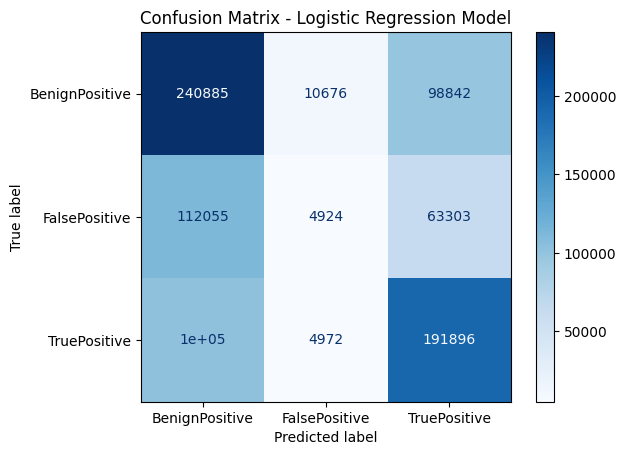

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression Model
model_logistic = LogisticRegression(random_state=42)

# Print message for evaluation
print(f"\nEvaluating Logistic Regression Model...")

# Fit the logistic regression model
model_logistic.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = model_logistic.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=0))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()


In [ ]:
Decision Tree


Evaluating Decision Tree...
Accuracy: 0.7807181541925677
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79    350403
           1       0.95      0.51      0.66    180282
           2       0.95      0.73      0.83    298914

    accuracy                           0.78    829599
   macro avg       0.86      0.73      0.76    829599
weighted avg       0.83      0.78      0.78    829599



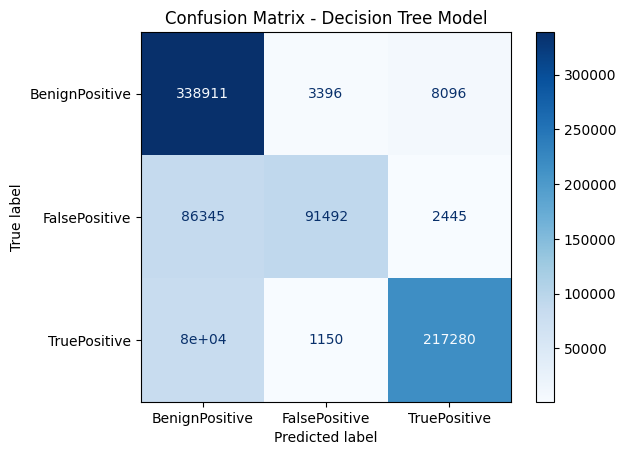

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Decision Tree with optimizations
model_dt = DecisionTreeClassifier(
    max_depth=10,            # Limit the depth of the tree
    random_state=42          # For reproducibility
)

# Print message for evaluation
print(f"\nEvaluating Decision Tree...")

# Fit the Decision Tree model
model_dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = model_dt.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

In [ ]:
TRAINING MODEL
RANDOM FOREST CLASSIFIER


Evaluating RandomForest...
Accuracy: 0.7943440143973173
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.99      0.81    350403
           1       0.95      0.54      0.69    180282
           2       0.98      0.72      0.83    298914

    accuracy                           0.79    829599
   macro avg       0.87      0.75      0.78    829599
weighted avg       0.85      0.79      0.79    829599



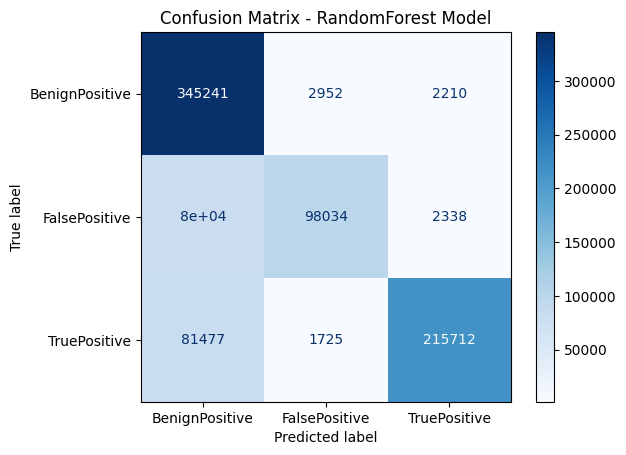

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize RandomForest with optimizations
model_rf = RandomForestClassifier(
    n_estimators=50,        # Reduce the number of trees
    max_depth=10,           # Limit the depth of the trees
    max_features='sqrt',    # Use the square root of features
    n_jobs=-1,              # Enable parallel processing
    random_state=42
)

# Print message for evaluation
print(f"\nEvaluating RandomForest...")

# Fit the model
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - RandomForest Model')
plt.show()



Evaluating XGBoost...
Accuracy: 0.9227349599023142
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92    350403
           1       0.94      0.86      0.90    180282
           2       0.95      0.91      0.93    298914

    accuracy                           0.92    829599
   macro avg       0.93      0.91      0.92    829599
weighted avg       0.92      0.92      0.92    829599



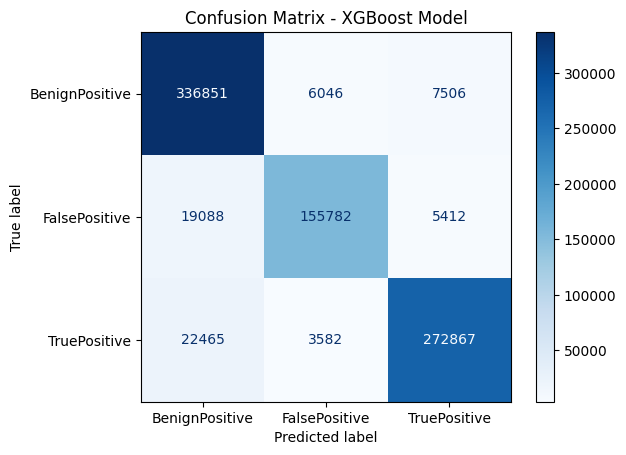

In [24]:
model_xgb = XGBClassifier(random_state=42)

#XGBOOST
print(f"\nEvaluating XGBoost...")

# Fit the model
model_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model_xgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['BenignPositive', 'FalsePositive', 'TruePositive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost Model')
plt.show()

In [26]:
with open(r'C:\project4\xgb_classifier.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)
# Loading the model back from the pickle file


In [ ]:
Splitting Of Test

In [42]:
X1= df_test[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]
y1= df_test['IncidentGrade']

In [43]:
X1

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,Sha256,IpAddress,AccountSid,DeviceName,NetworkMessageId,CountryCode,Day
0,657,11767,87199,524,563,11,28,0,138268,360606,2610,153085,529644,242,4
1,3,91158,632273,2,2,1,15,0,138268,360606,441377,2833,529644,242,3
2,145,32247,131719,2932,10807,11,23,1,4296,360606,441377,153085,529644,242,8
3,222,15294,917686,0,0,10,7,1,138268,360606,441377,153085,529644,242,12
4,363,7615,5944,27,18,5,28,0,138268,360606,133549,153085,529644,242,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,262,3017,227156,139,120,10,28,0,138268,360606,13354,153085,529644,242,4
4147988,1323,31001,304819,219,196,10,28,0,138268,360606,95744,153085,529644,242,4
4147989,47,3653,7243,57,29,1,12,1,138268,1084,441377,153085,529644,242,15
4147990,70,4243,19142,1,1,10,18,0,138268,360606,53146,153085,529644,242,11


In [44]:
with open(r'C:\project4\xgb_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [45]:
print(type(loaded_model))

<class 'xgboost.sklearn.XGBClassifier'>


In [46]:
y_pred_new = loaded_model.predict(X1)

In [50]:
print("Accuracy:", accuracy_score(y1, y_pred_new))
print("Classification Report:")
print(classification_report(y1, y_pred_new))

Accuracy: 0.9234407877353669
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93   1752940
           1       0.94      0.87      0.90    902698
           2       0.96      0.91      0.93   1492354

    accuracy                           0.92   4147992
   macro avg       0.93      0.91      0.92   4147992
weighted avg       0.93      0.92      0.92   4147992



Comparison Table:
        Model  Accuracy  Macro-F1 Score  Precision (Macro)  Recall (Macro)
     logistic      0.53            0.41               0.44            0.45
     decision      0.73            0.76               0.86            0.73
Random Forest      0.79            0.78               0.79            0.87
      XGBoost      0.92            0.92               0.91            0.93

Best Model Based on Macro-F1 Score:
Model                XGBoost
Accuracy                0.92
Macro-F1 Score          0.92
Precision (Macro)       0.91
Recall (Macro)          0.93
Name: 3, dtype: object


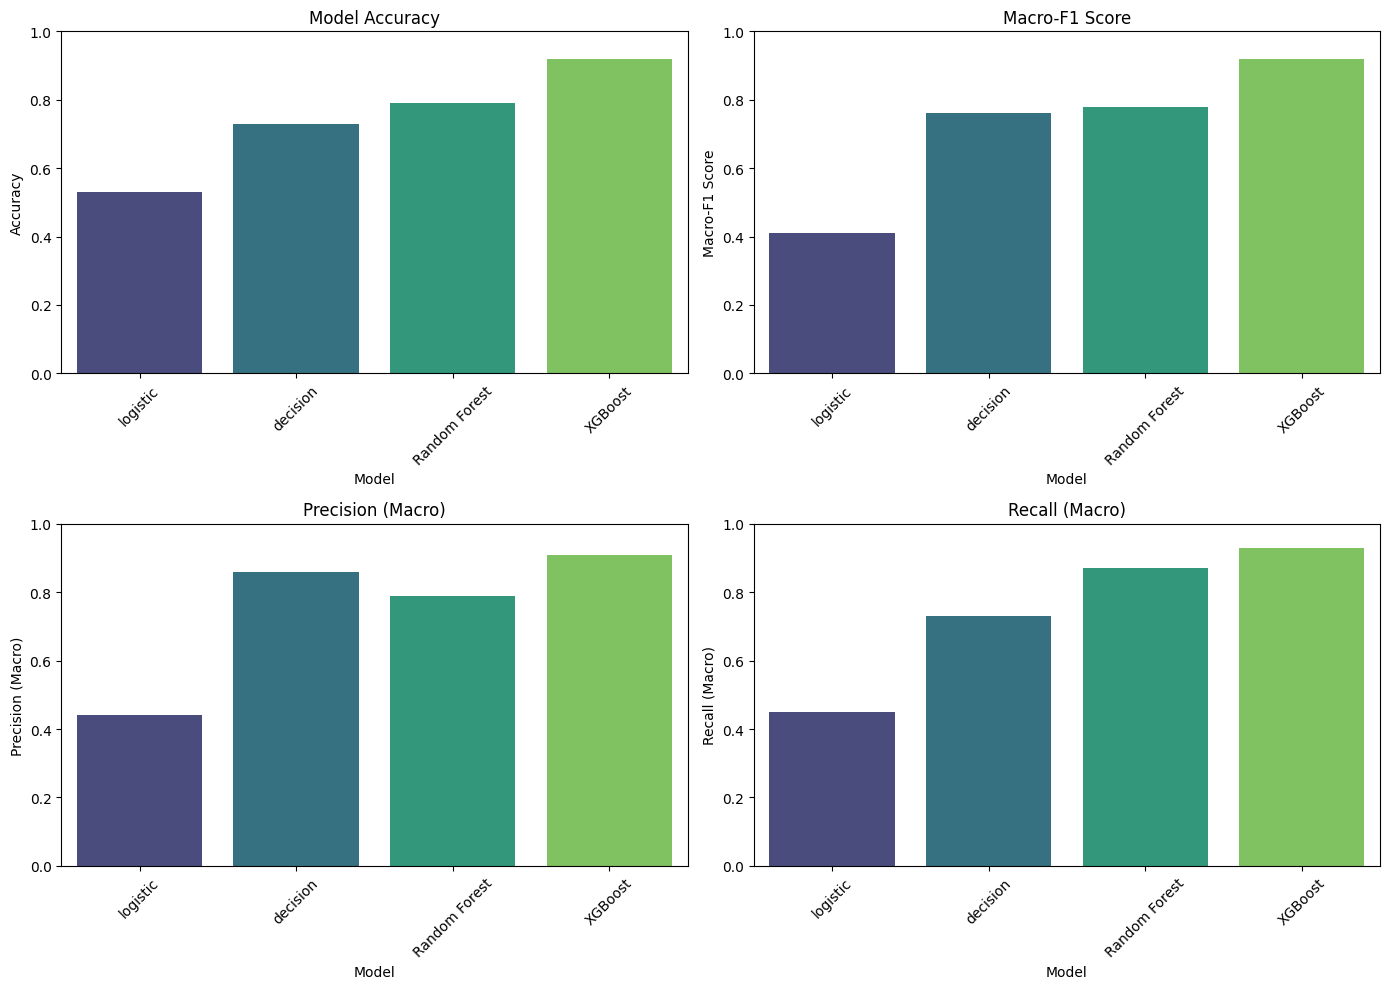

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for comparison based on your provided outputs
data = {
    'Model': ['logistic','decision','Random Forest', 'XGBoost'] ,
    'Accuracy': [0.53, 0.73, 0.79, 0.92],
    'Macro-F1 Score': [0.41, 0.76, 0.78, 0.92],
    'Precision (Macro)': [0.44, 0.86, 0.79, 0.91],
    'Recall (Macro)': [0.45, 0.73, 0.87, 0.93],
   }

# Convert to DataFrame
df = pd.DataFrame(data)

# Print comparison table
print("Comparison Table:")
print(df.to_string(index=False))

# Find the best model based on Macro-F1 Score
best_model = df.loc[df['Macro-F1 Score'].idxmax()]

# Print the best model
print("\nBest Model Based on Macro-F1 Score:")
print(best_model)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot for Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Macro-F1 Score
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Macro-F1 Score', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Macro-F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Precision (Macro)
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Precision (Macro)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Precision (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Recall (Macro)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Recall (Macro)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Recall (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()
plt.show()



ERROR ANALYSIS


In [62]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have already trained the models:
# model_decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
# model_rf = RandomForestClassifier().fit(X_train, y_train)
# model_xgb = XGBClassifier().fit(X_train, y_train)

# Predict using all three models
y_pred_dt= model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate accuracy for each model
print("logistic regression:", accuracy_score(y_test, y_pred_logistic))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Error analysis for misclassified cases
#logistic regression
errors = (y_test !=y_pred_logistic)
error_analysis = pd.DataFrame({'True': y_test[errors], 'Predicted':y_pred_logistic[errors]})
print("Error Analysis (Misclassifications)for logistic regression:")
print(error_analysis)
# For Decision Tree
errors_dt = (y_test != y_pred_dt)
error_analysis_dt = pd.DataFrame({'True': y_test[errors_dt], 'Predicted': y_pred_dt[errors_dt]})
print("\nError Analysis (Misclassifications) for Decision Tree:")
print(error_analysis_dt)

# For Random Forest
errors_rf = (y_test != y_pred_rf)
error_analysis_rf = pd.DataFrame({'True': y_test[errors_rf], 'Predicted': y_pred_rf[errors_rf]})
print("\nError Analysis (Misclassifications) for Random Forest:")
print(error_analysis_rf)

# For XGBoost
errors_xgb = (y_test != y_pred_xgb)
error_analysis_xgb = pd.DataFrame({'True': y_test[errors_xgb], 'Predicted': y_pred_xgb[errors_xgb]})
print("\nError Analysis (Misclassifications) for XGBoost:")
print(error_analysis_xgb)


logistic regression: 0.527610327399141
Decision Tree Accuracy: 0.7807181541925677
Random Forest Accuracy: 0.7943440143973173
XGBoost Accuracy: 0.9227349599023142
Error Analysis (Misclassifications)for logistic regression:
         True  Predicted
2480092     0          2
808028      0          1
132624      1          0
2701115     1          0
1587438     1          0
...       ...        ...
1967660     1          0
3643448     1          2
685884      1          0
3769107     0          2
2540055     0          2

[391894 rows x 2 columns]

Error Analysis (Misclassifications) for Decision Tree:
         True  Predicted
437473      2          0
2701115     1          0
1587438     1          0
3910724     1          0
321675      1          0
...       ...        ...
649766      2          0
1716804     1          0
1967660     1          0
685884      1          0
3501489     2          0

[181916 rows x 2 columns]

Error Analysis (Misclassifications) for Random Forest:
         Tru